In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('/kaggle/input/ccdata/CC GENERAL.csv')

In [3]:
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [4]:
data.drop('CUST_ID',axis=1,inplace=True)

In [5]:
data.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [6]:
data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].median(),inplace=True)
data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].median(),inplace=True)

In [7]:
data.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

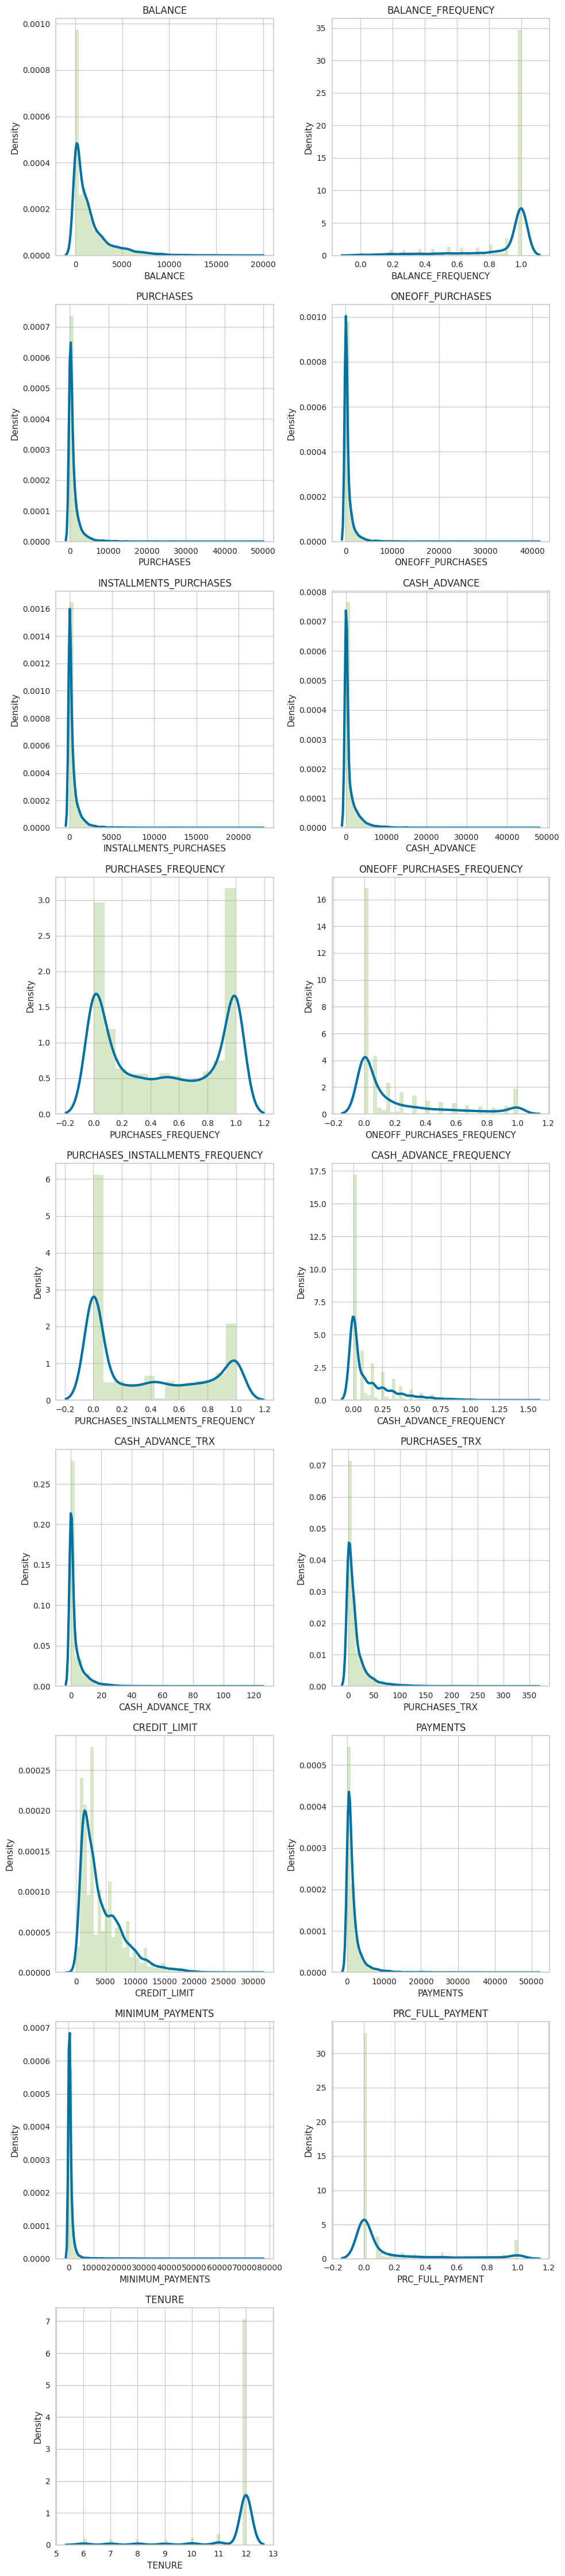

In [8]:
# 2 sütunlu ve yeterli sayıda satırı olan bir figür oluşturma
# 17 özellik için 9 satıra ihtiyacımız var (17 özellik / 2 sütun yukarı yuvarlandığında)
fig, axes = plt.subplots(nrows=9, ncols=2, figsize=(10, 45))

# Eksen dizisini düzleştirmek
axes = axes.flatten()

# Her özellik ve ilgili eksen için döngü
for i, column in enumerate(data.columns):
    sns.distplot(data[column], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"}, ax=axes[i])
    axes[i].set_title(column)

# Boş alt grafikleri kaldırma
for i in range(len(data.columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

*Yeşil çubuklar histogramı, mavi çizgi ise çekirdek yoğunluk tahminini (KDE) temsil etmektedir. KDE, belirli bir değer aralığındaki veri yoğunluğunun sürekli bir tahminidir. Histogram, ise belirli aralıklardaki gözlem sayısını gösteren çubuklar ile ayrık bir dağılımı temsil eder.*
* BALANCE: Çoğu gözlem düşük bir bakiye değerine sahipken, daha yüksek bakiyelerdeki gözlemler azalmaktadır.
* BALANCE_FREQUENCY: Bu değişkenin dağılımı, yüksek sıklık değerlerine doğru bir yığılma göstermektedir, bu da kullanıcıların bakiyelerini sık sık güncellediklerini düşündürebilir.
* PURCHASES: Büyük çoğunluğu düşük alışveriş tutarlarına sahipken, çok yüksek tutarlarda alışveriş yapan birkaç gözlem bulunmaktadır.
* ONEOFF_PURCHASES: Tek seferlik büyük alışverişlerin nadiren yapıldığını gösteren bir dağılım söz konusudur.
* INSTALLMENTS_PURCHASES: Taksitli alışverişlerin de çoğunlukla düşük tutarlarda olduğunu göstermektedir.
* CASH_ADVANCE: Nakit ilerlemelerinin çoğunluğunun düşük olduğu, ancak bazı yüksek değerlerin de mevcut olduğu gözlemlenmektedir.
* PURCHASES_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, CASH_ADVANCE_FREQUENCY: Bu sıklık değişkenleri genellikle 0 veya 1 değerlerinde yoğunlaşmaktadır, bu da bazı kullanıcıların alışveriş yapma veya nakit ilerleme kullanma konusunda tutarlı olduğunu veya hiç yapmadığını gösterebilir.
* CREDIT_LIMIT: Kredi limitinin genellikle orta seviyede yoğunlaştığı, ancak bazı kullanıcıların çok yüksek veya düşük limitlere sahip olduğu görülmektedir.
* PAYMENTS: Ödemelerin büyük çoğunluğu düşükken, yüksek ödemeler yapan birkaç kullanıcı mevcut.
* MINIMUM_PAYMENTS: Minimum ödeme miktarları genellikle düşük olmakla birlikte, çok yüksek minimum ödemeler yapan kullanıcılar da var.
* PRC_FULL_PAYMENT: Bu değişkenin dağılımı, kullanıcıların faturalarının tamamını ödeme eğilimlerini gösterir ve çoğunlukla 0 civarında yoğunlaşır, yani tam ödeme yapmayan çok sayıda kullanıcı vardır.
* TENURE: Kullanım süresi genellikle 12 ay civarında yoğunlaşmaktadır ki bu genellikle bir yıllık anlaşma süresini gösterir.

In [9]:
corr = data.corr()

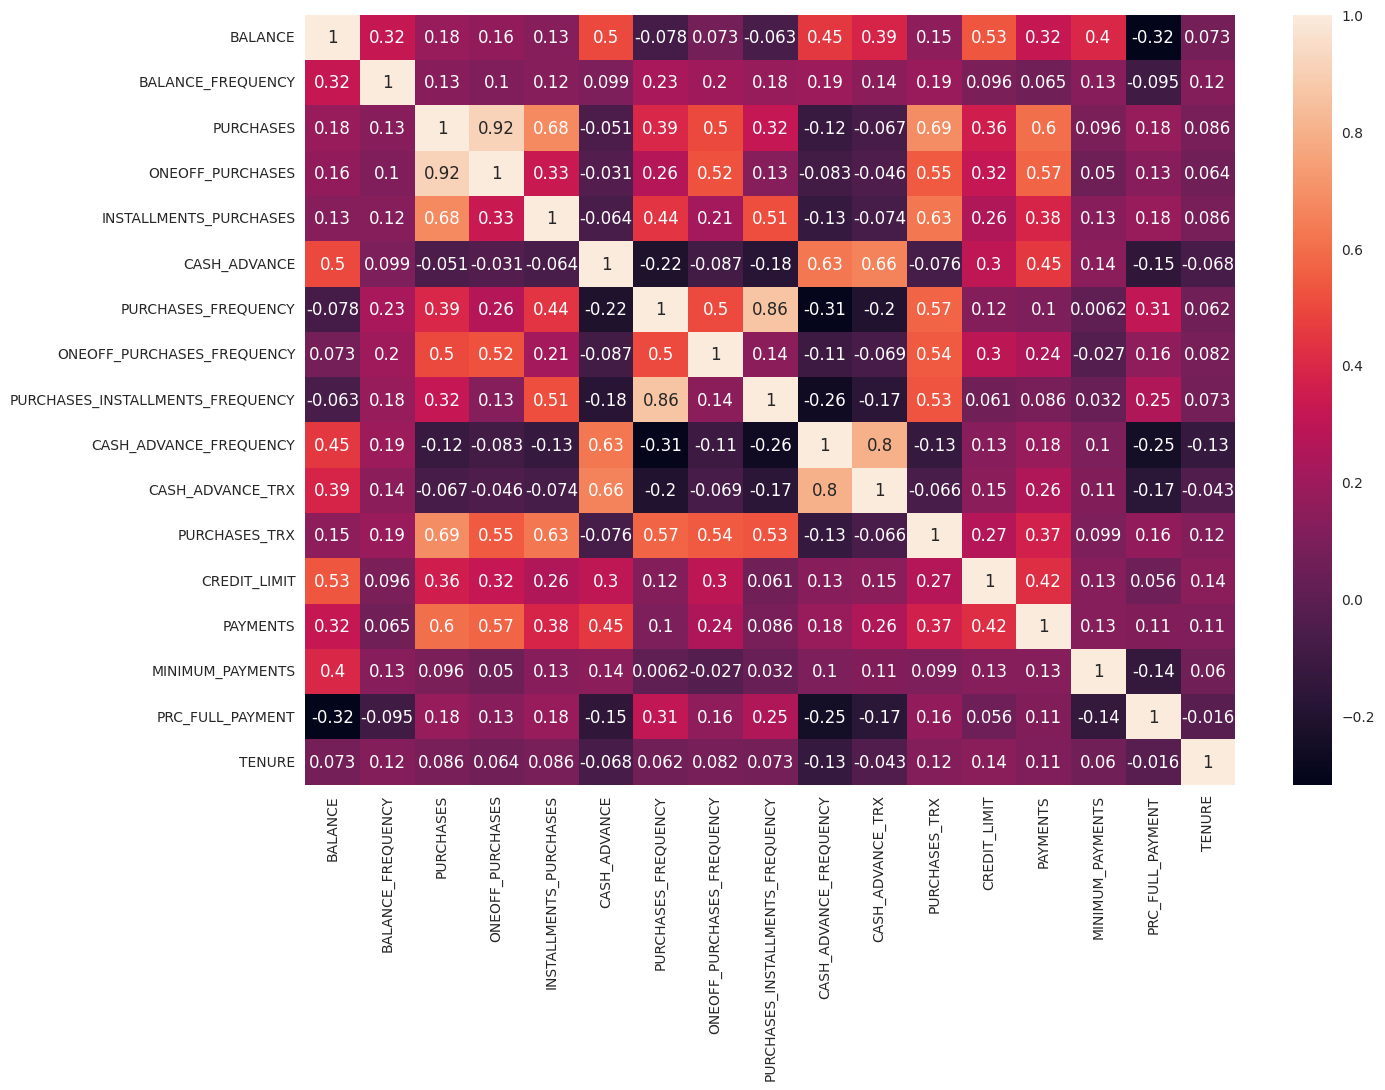

In [10]:
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True)
plt.show()

* CREDIT_LIMIT ve PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES arasında pozitif bir korelasyon var. Bu, kredi limiti yüksek olan kullanıcıların daha fazla harcama yaptığını düşündürebilir.
* BALANCE_FREQUENCY ve BALANCE arasındaki pozitif korelasyon, bakiyenin sıklıkla güncellenmesi ile yüksek bakiye arasında bir ilişki olduğunu gösteriyor.
* PURCHASES_FREQUENCY ile ONEOFF_PURCHASES_FREQUENCY ve PURCHASES_INSTALLMENTS_FREQUENCY arasında güçlü pozitif korelasyonlar var, bu da sık alışveriş yapan kullanıcıların hem tek seferlik hem de taksitli alışverişleri sıklıkla yaptıklarını gösteriyor.
* CASH_ADVANCE ve CASH_ADVANCE_FREQUENCY arasındaki negatif korelasyon, bu matriste gösterilen renk skalası ve sayısal değerlerle çelişiyor gibi görünüyor, bu da veri üzerinde yanlış bir etiketleme veya görselleştirme hatası olabileceğini düşündürebilir.

In [11]:
# Verlierin Ölçeklendirilmesi
scaler = StandardScaler()
data_scaled= scaler.fit_transform(data)
data_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.3024    ,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.09749953,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.0932934 ,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.32687479,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.33830497,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.3243581 ,
        -0.52555097, -4.12276757]])

*Her bir özelliği (sütunu), özelliklerin ortalamasını çıkararak ve varyansına bölerek ölçeklendirir. Bu işlem, özelliklerin ortalama değerinin 0 ve standart sapmasının 1 olmasını sağlar.*

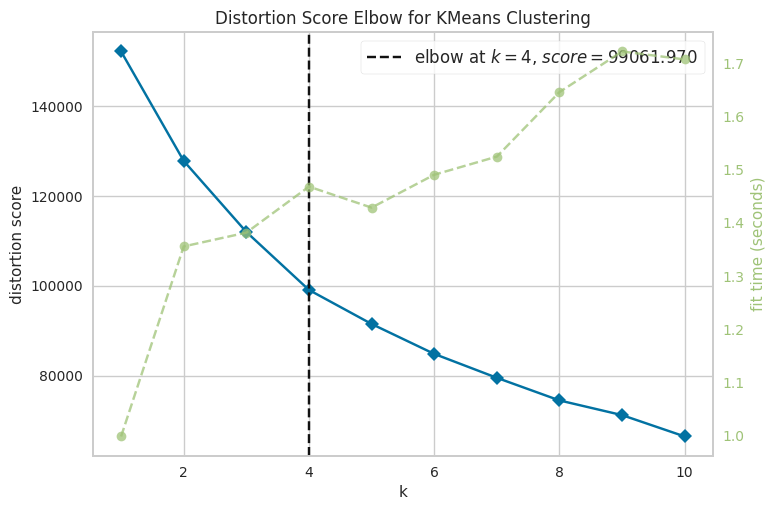

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [12]:
# KMeans oluşturma
km = KMeans()

# KMeans modeli ve keşfedilecek küme sayısı aralığı ile KElbowVisualizer'ı örnekleme
visualizer = KElbowVisualizer(km, k=(1, 11))

# Veriyi görselleştiriciye fit etme
visualizer.fit(data_scaled)

# Şekli (figürü) sonlandıralım ve gösterelim
visualizer.show()

*Verimizi 4' e bölmemizi tavsiye etti*

In [13]:
kmeans = KMeans(4)
labels = kmeans.fit_predict(data_scaled)

In [14]:
df = kmeans.cluster_centers_

In [15]:
cluster_centers = pd.DataFrame(df,columns = [data.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.316260,0.253284,0.117080,0.006257,0.265106,-0.365173,0.989481,0.327251,0.879153,-0.461165,-0.359505,0.307291,-0.069014,-0.132286,-0.085002,0.398033,0.060357
1,1.449279,0.385375,-0.240081,-0.169355,-0.256621,1.671452,-0.514703,-0.220559,-0.457603,1.738971,1.608131,-0.289296,0.826090,0.594475,0.491736,-0.406393,-0.098781
2,-0.270469,-0.376097,-0.342068,-0.230193,-0.385713,-0.186528,-0.788380,-0.388065,-0.705927,-0.108879,-0.170144,-0.472806,-0.335800,-0.263813,-0.126300,-0.256930,-0.052831
3,0.975456,0.466690,3.188550,2.783848,2.425095,-0.134901,1.135625,1.812260,1.064826,-0.310555,-0.154505,3.045176,1.443802,1.962088,0.489980,0.459303,0.322940


In [16]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data=cluster_centers, columns=[data.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,906.206541,0.937271,1253.347114,602.822370,650.800021,213.086711,0.887477,0.300083,0.713835,0.042860,0.795468,22.347943,4243.178370,1350.187657,646.626359,0.270132,11.598092
1,4581.026209,0.968562,490.267785,311.343322,179.008488,4483.984804,0.283775,0.136661,0.182574,0.483130,14.223140,7.519008,7499.962434,3454.090328,1991.960518,0.034852,11.385124
2,1001.515947,0.788177,272.370612,210.364130,62.272566,587.712934,0.173936,0.086690,0.083884,0.113356,2.087719,2.957644,3272.494570,969.431873,550.291852,0.078567,11.446617
3,3594.804621,0.987825,7815.591616,5213.055404,2604.051364,695.978299,0.946132,0.743090,0.787626,0.072999,2.194444,90.401515,9747.474747,7413.195964,1987.863738,0.288053,11.949495


In [17]:
data_cluster = pd.concat([data,pd.DataFrame({'cluster':labels})],axis=1)
data_cluster.sample(4)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
1637,5269.723990,1.000000,682.57,669.47,13.10,0.000000,0.416667,0.333333,0.083333,0.0,0,9,7000.0,1771.172074,1336.751401,0.000000,12,2
118,54.933231,0.272727,495.00,0.00,495.00,0.000000,0.166667,0.000000,0.166667,0.0,0,2,7000.0,1969.845566,147.049952,1.000000,12,2
6951,795.497557,0.909091,0.00,0.00,0.00,5676.779668,0.000000,0.000000,0.000000,0.5,6,0,50.0,7570.207782,410.260506,0.444444,12,1
5110,142.430458,1.000000,1488.84,0.00,1488.84,0.000000,1.000000,0.000000,1.000000,0.0,0,24,5000.0,1450.096836,178.871755,1.000000,12,0


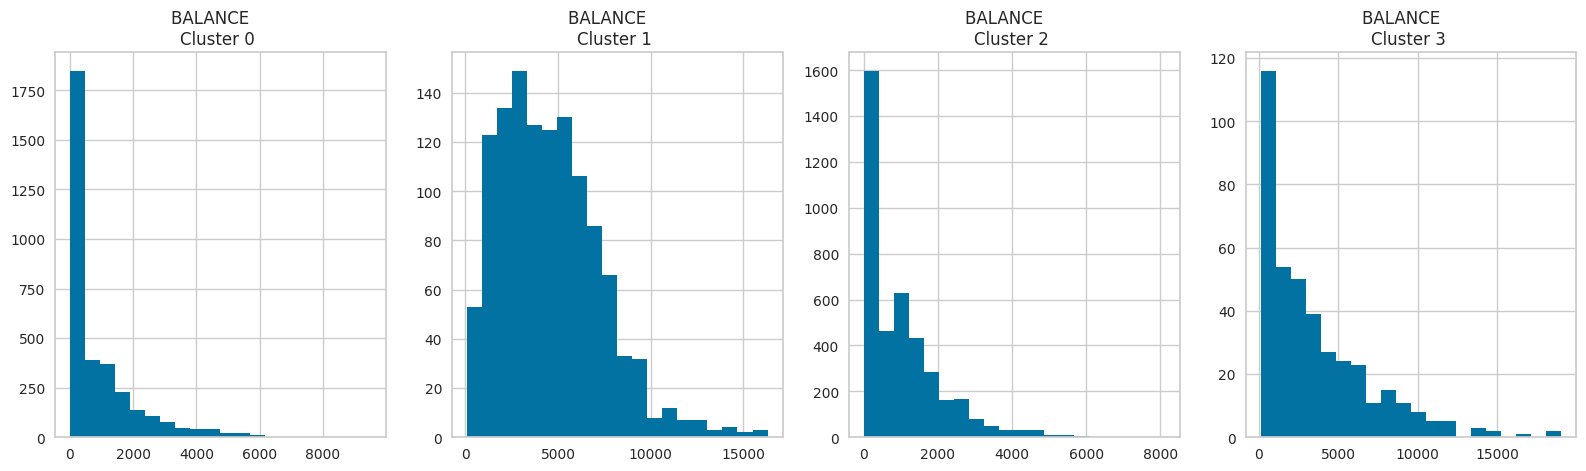

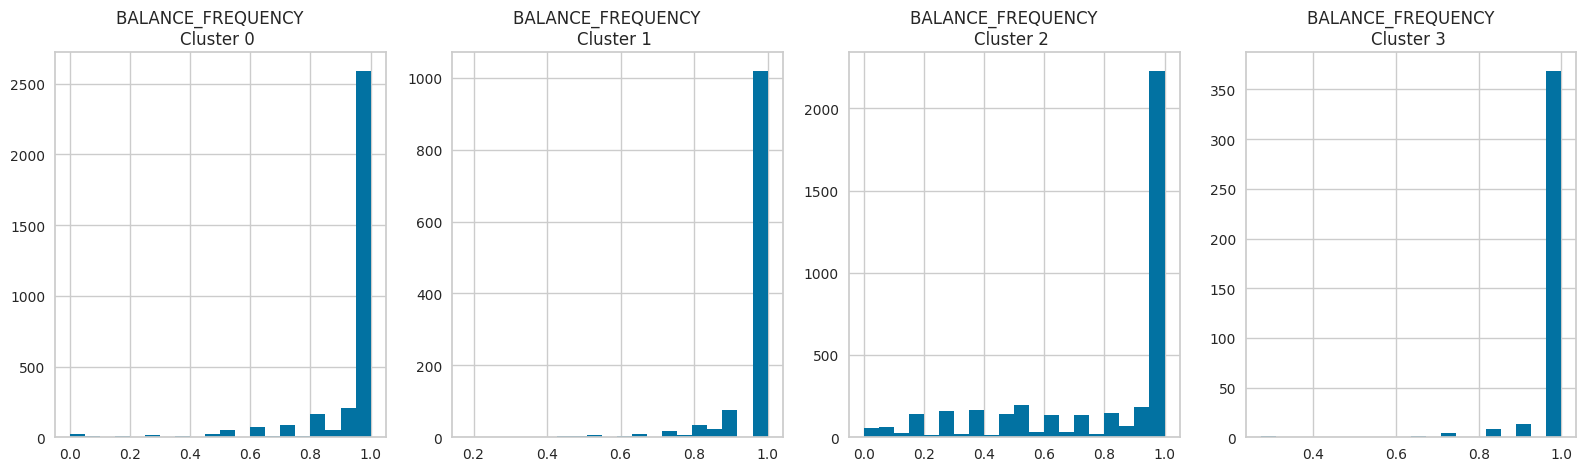

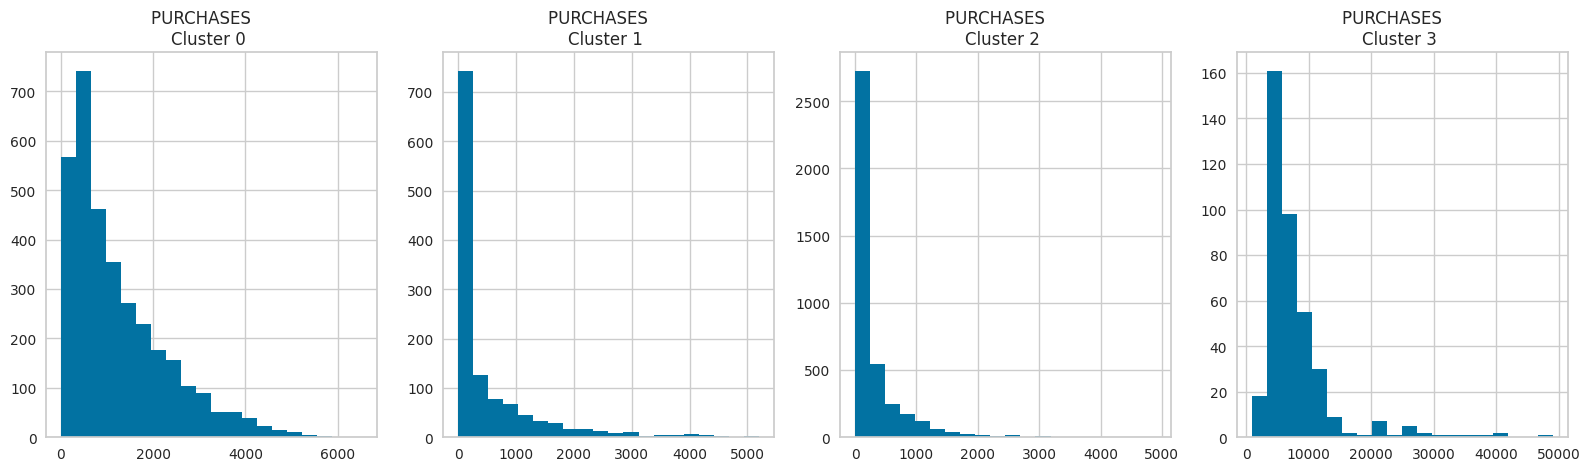

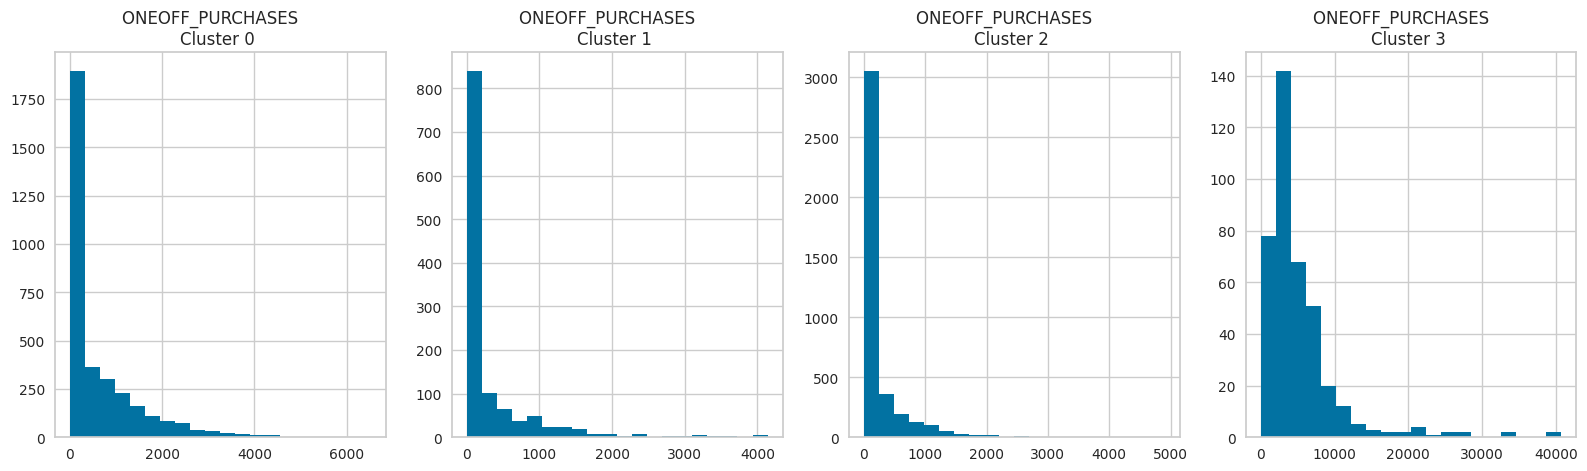

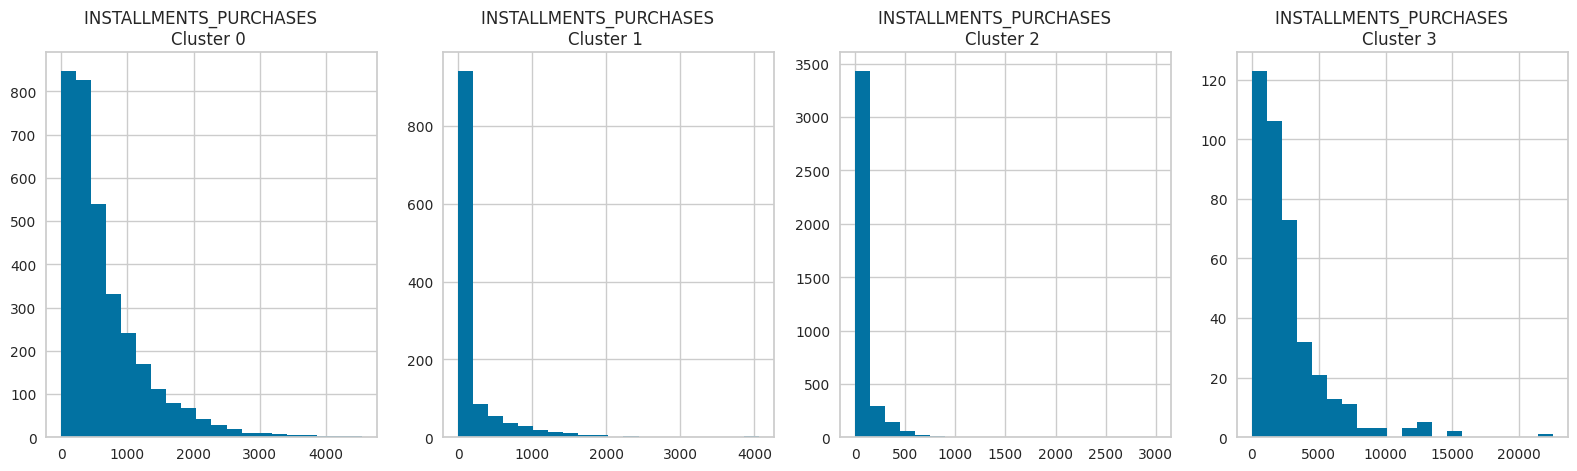

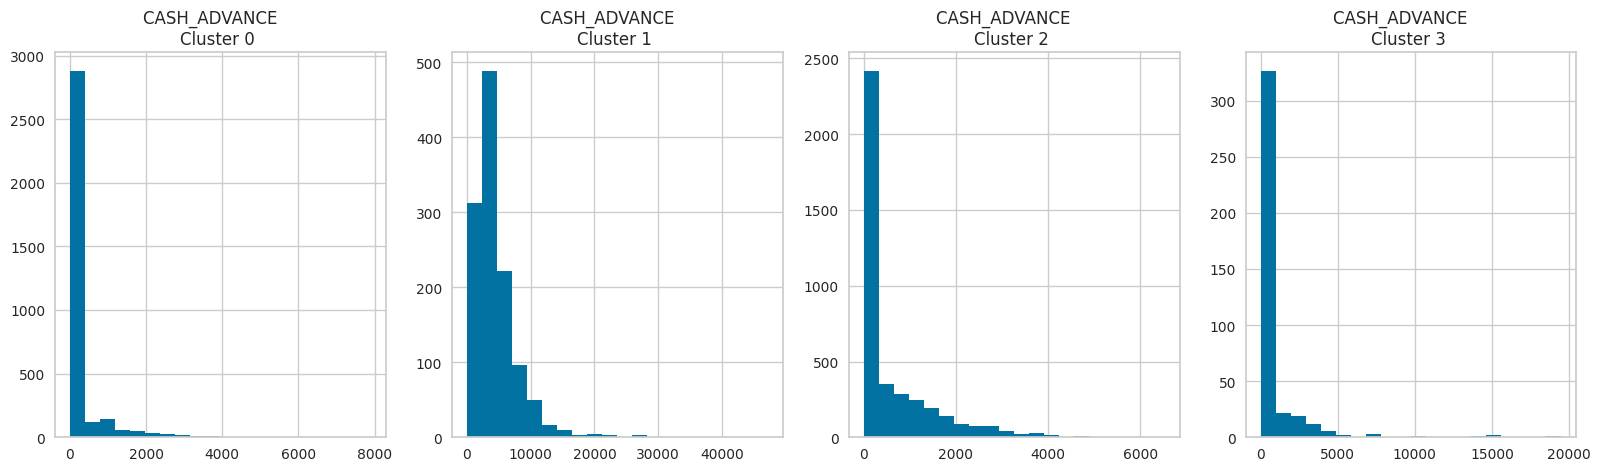

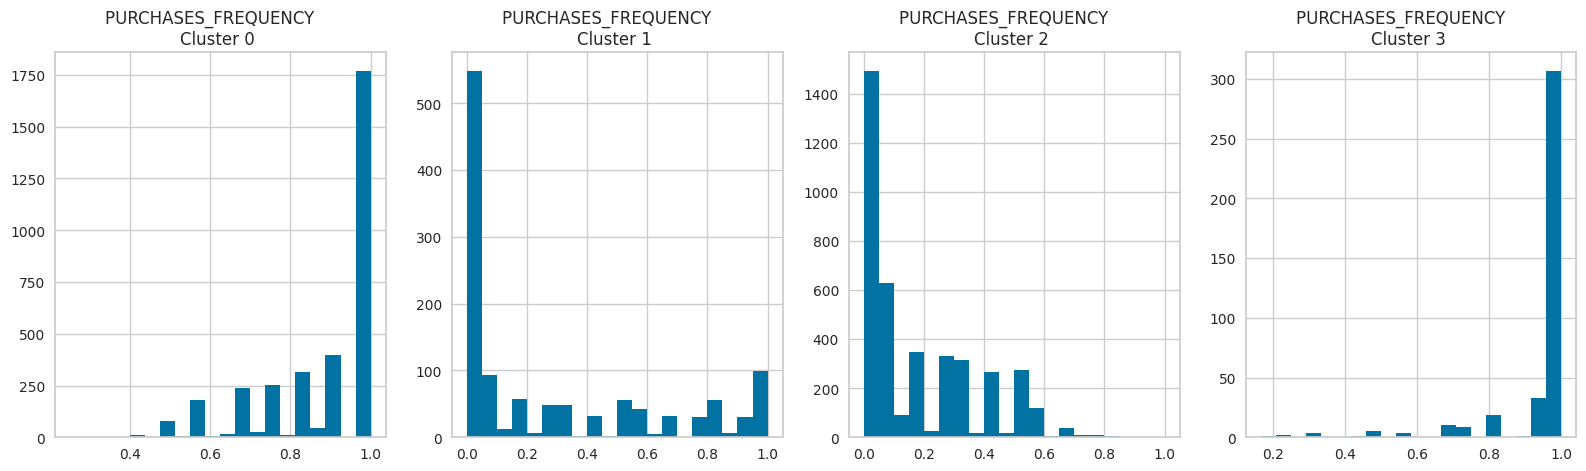

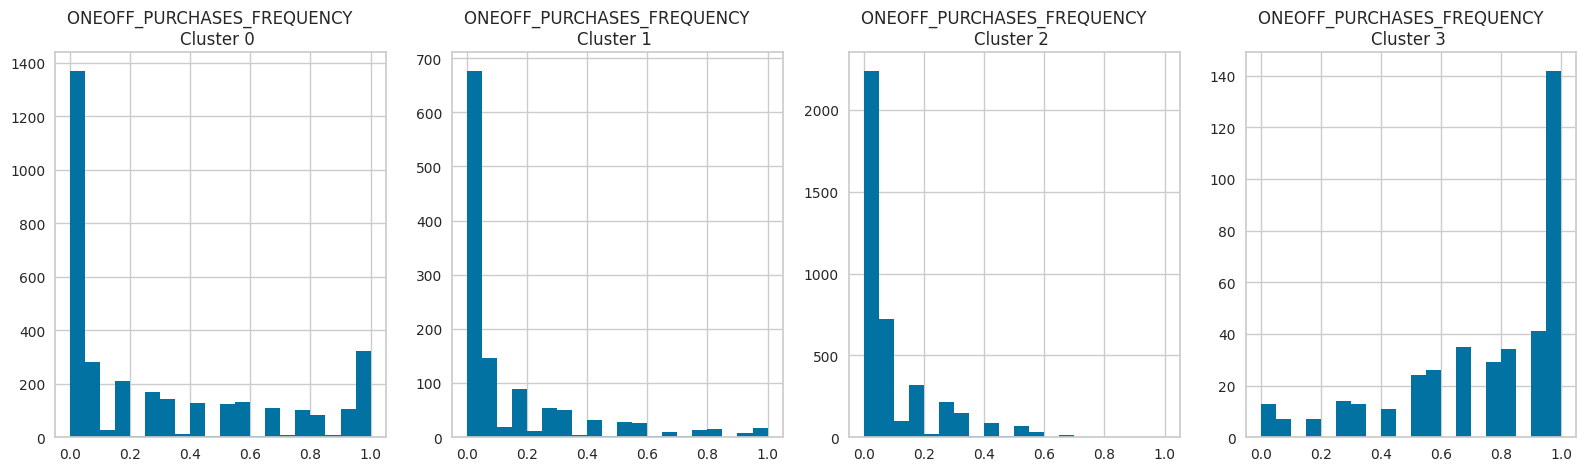

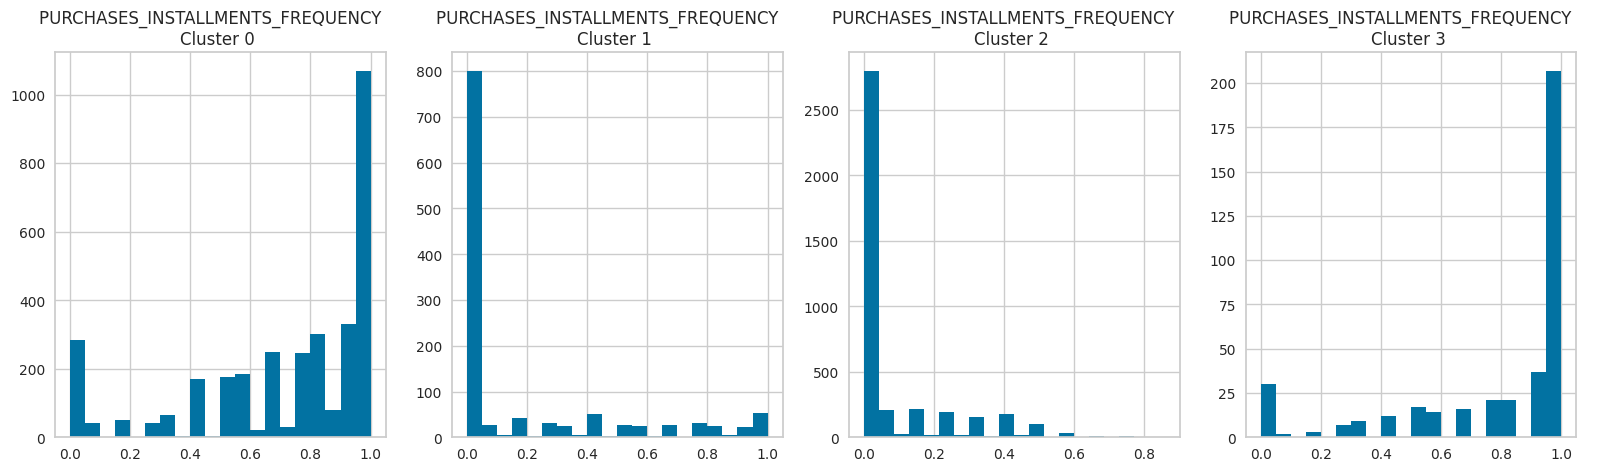

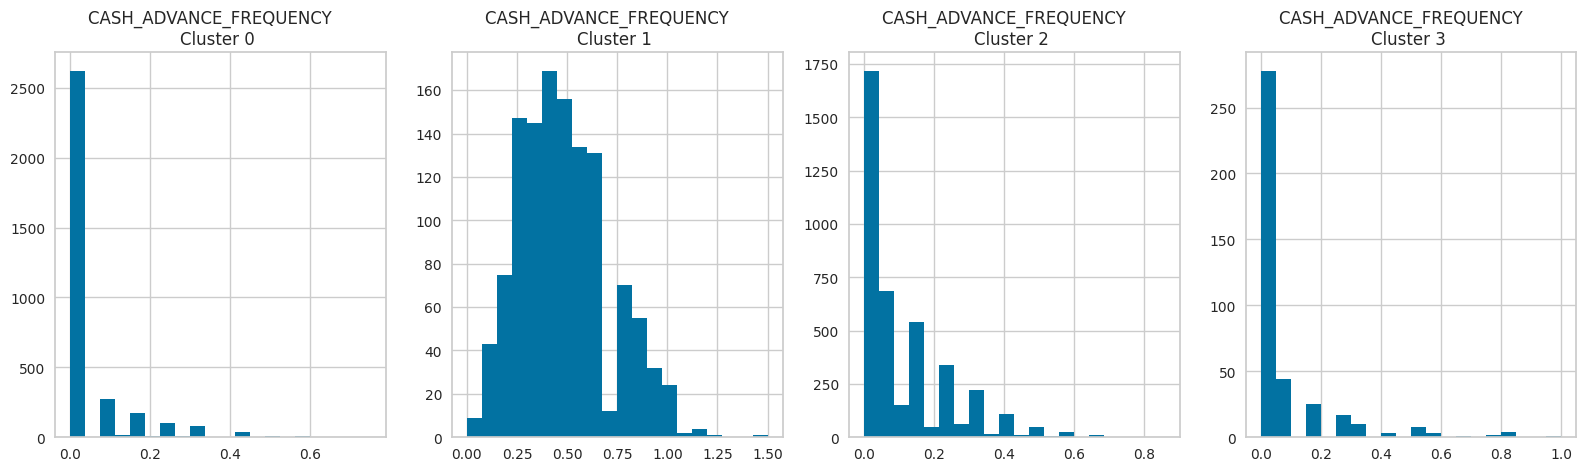

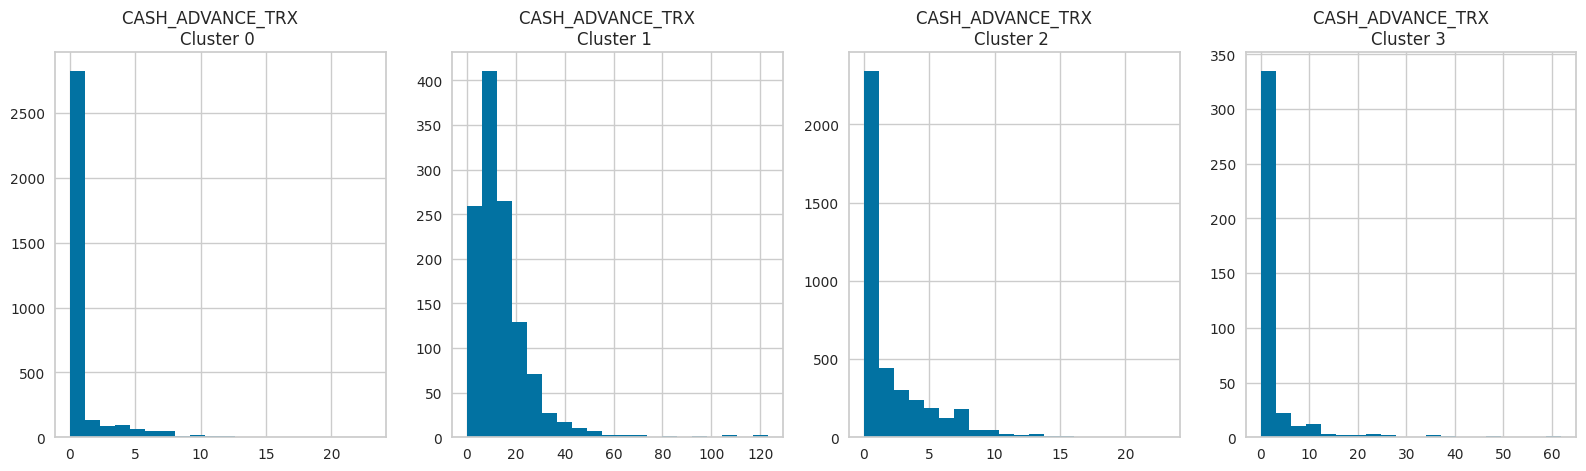

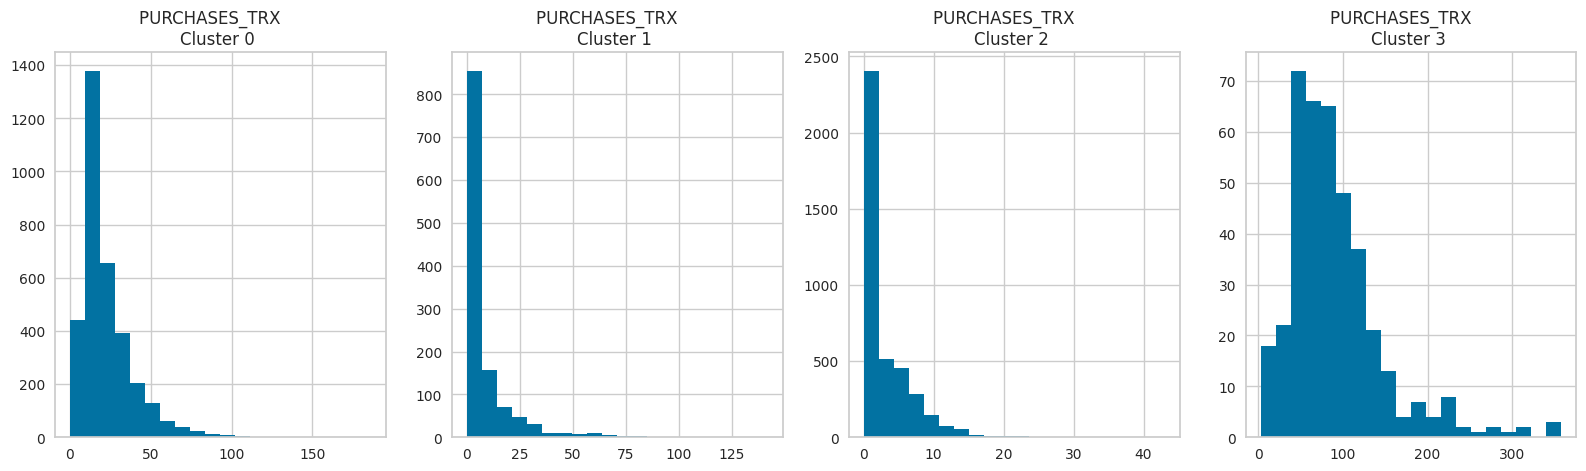

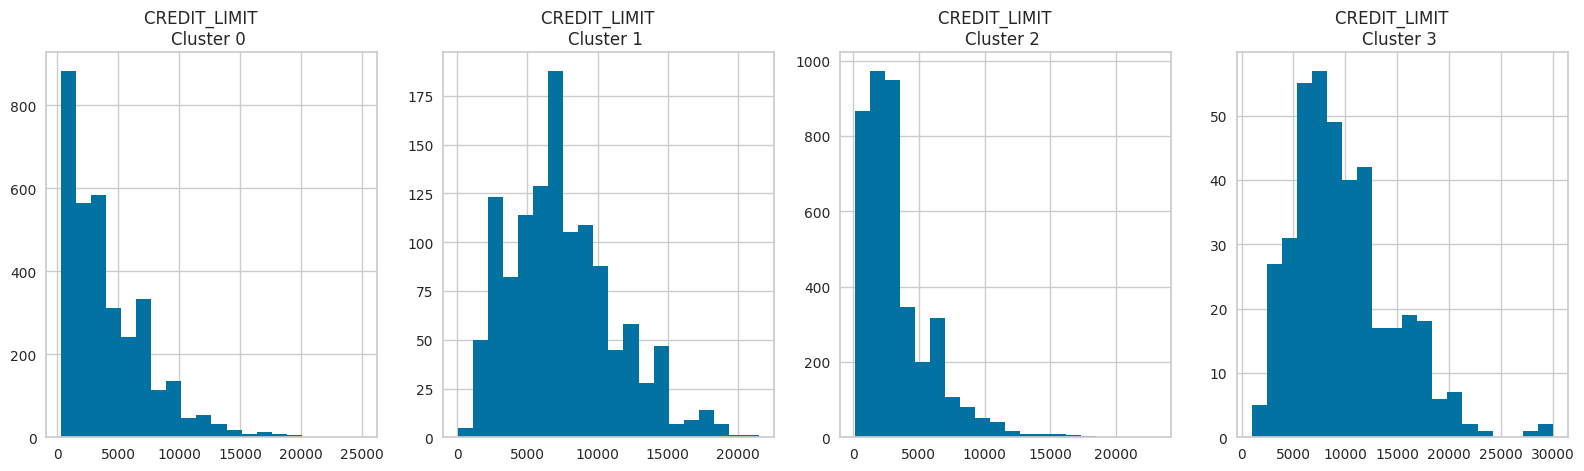

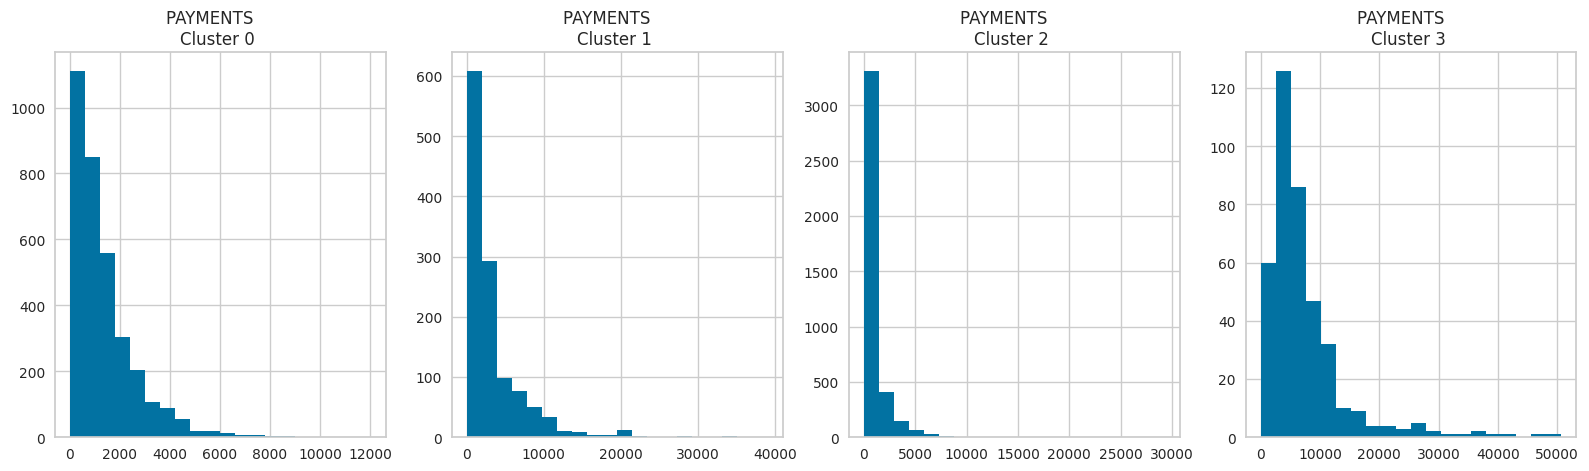

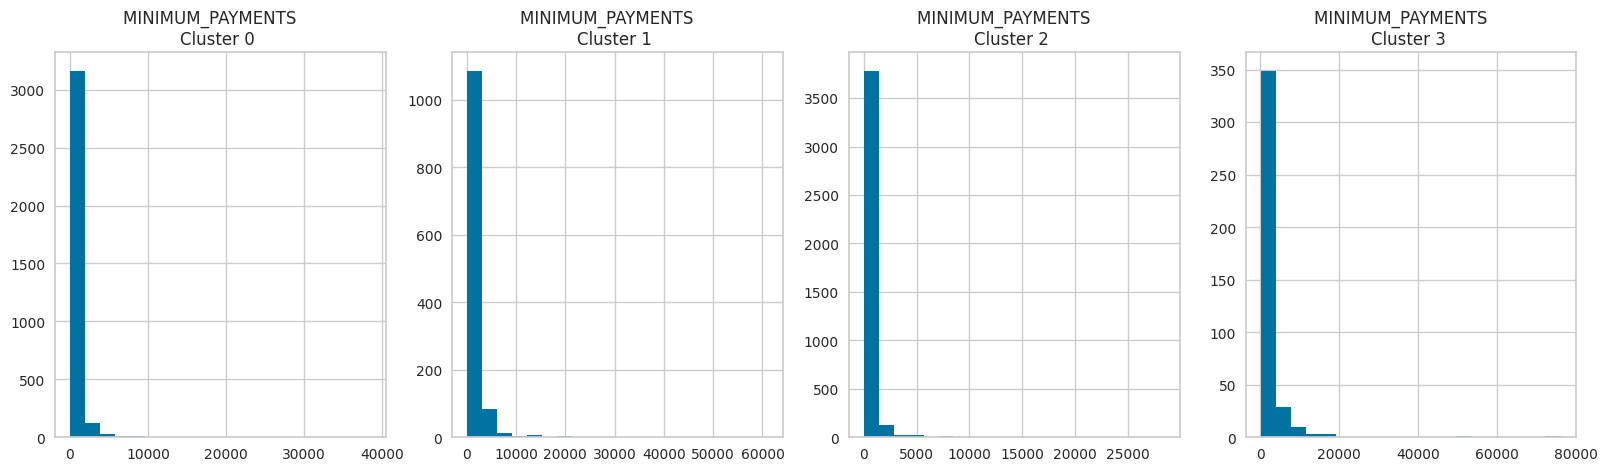

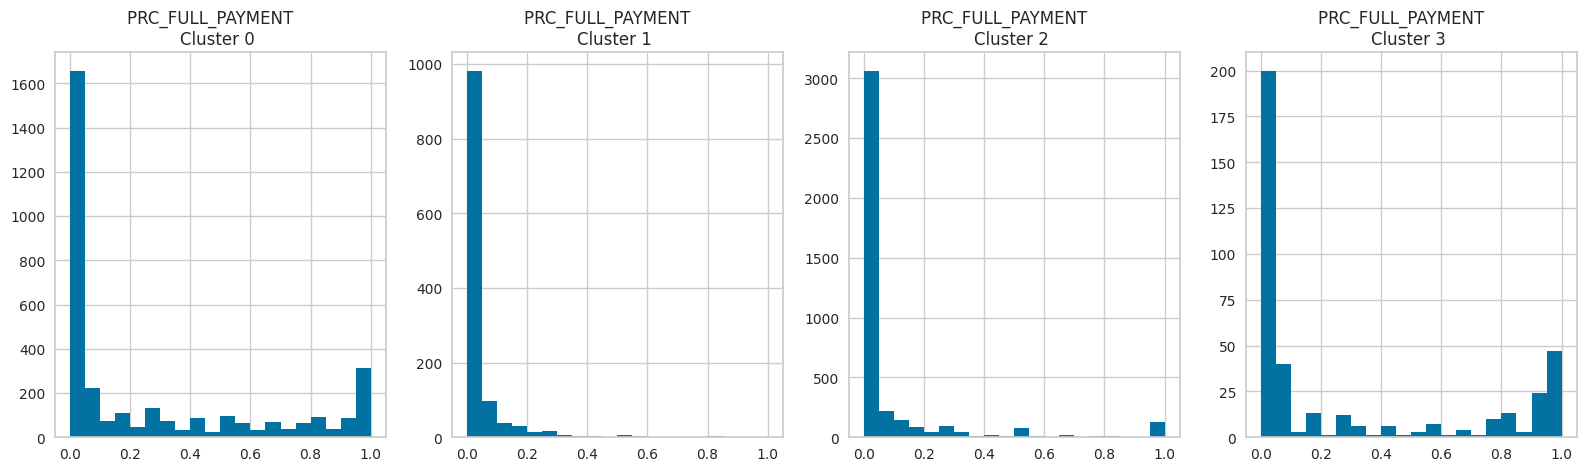

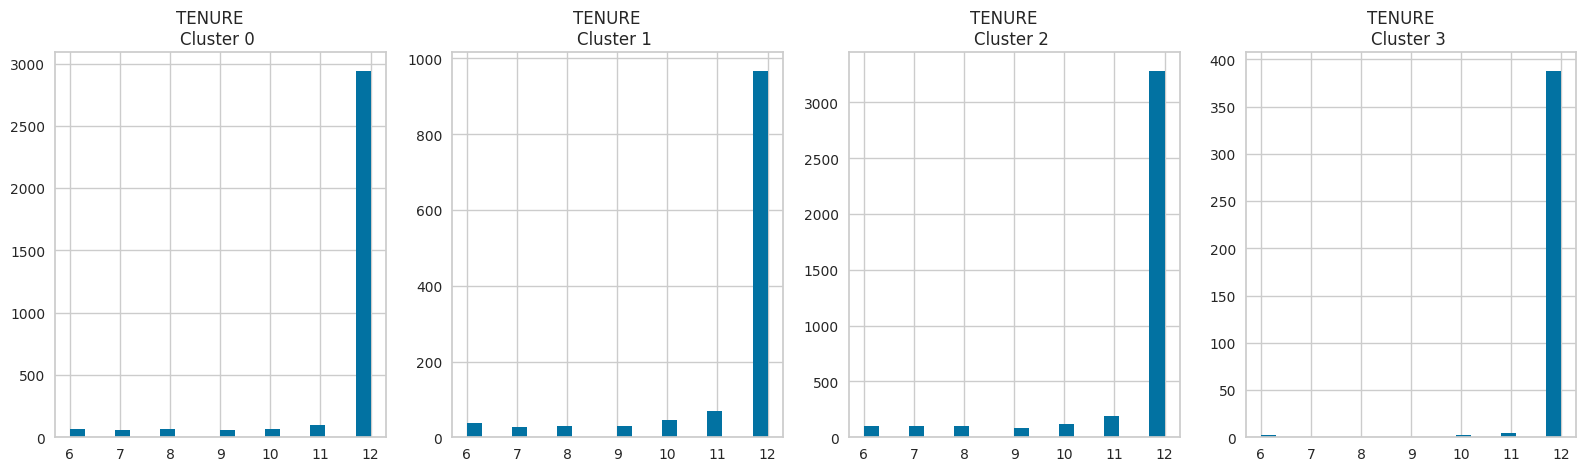

In [18]:
for i in data.columns:
  plt.figure(figsize = (35, 5))
  for j in range(4):
    plt.subplot(1,7,j+1)
    cluster = data_cluster[data_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))

  plt.show()

# APPLY PRINCIPAL COMPONENT ANALYSIS AND VISUALIZE THE RESULTS

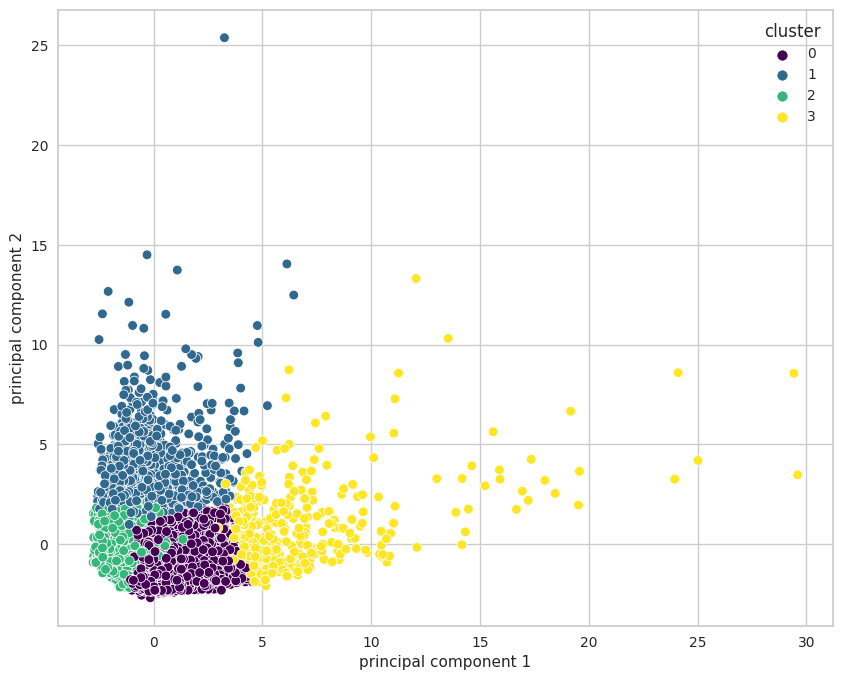

In [19]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data_scaled)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf['cluster'] = data_cluster['cluster']
plt.figure(figsize=(10,8))
sns.scatterplot(data=principalDf, x='principal component 1', y='principal component 2', hue='cluster', palette='viridis')
plt.show()

In [20]:
# t-SNE'yi üç boyutlu olarak uygulama
tsne = TSNE(n_components=3, random_state=42)
tsne_results = tsne.fit_transform(data_scaled)

# t-SNE sonuçlarını ve etiketleri Plotly 3D scatter plot'a aktarın
fig = go.Figure()

# Her bir küme için bir iz ekleme
for cluster_id in np.unique(labels):
    cluster_indices = labels == cluster_id
    fig.add_trace(go.Scatter3d(
        x=tsne_results[cluster_indices, 0],
        y=tsne_results[cluster_indices, 1],
        z=tsne_results[cluster_indices, 2],
        mode='markers',
        marker=dict(
            size=5,
            opacity=0.8,
        ),
        name=f'Cluster {cluster_id}'
    ))

# 3D grafik için düzeni güncelleme
fig.update_layout(
    title='3D t-SNE Visualization',
    scene=dict(
        xaxis_title='Component 1',
        yaxis_title='Component 2',
        zaxis_title='Component 3'
    ),
    margin=dict(l=0, r=0, b=0, t=0)
)

# Grafik gösterimi
fig.show()